In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

In [2]:

dotenv.load_dotenv(override=True)

username=os.getenv("username")
password=os.getenv("password")
host=os.getenv("host")
dbname="Titanic"

conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)

query = """SELECT * FROM titanic"""
tit = pd.read_sql(query, db_engine)
db_engine.dispose()

tit

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [3]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   PClass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Survived     1309 non-null   int64  
 12  EmbarkDate   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [6]:
tit.describe()

,PassengerId,PClass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,23.877517,0.498854,0.385027,33.270825,0.372804
std,378.020061,0.837836,17.590845,1.041658,0.865560,51.747086,0.483735
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,7.000000,0.000000,0.000000,7.900000,0.000000
50%,655.000000,3.000000,24.000000,0.000000,0.000000,14.450000,0.000000
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.280000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.330000,1.000000


In [4]:
tit.shape

(1309, 13)

In [ ]:
"""Esercizio 
Sul database titanic, effettuiamo le seguenti analisi: 
• Quanti ponti c'erano sulla nave? 
• Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco 
• Fare la stessa cosa per la colonna alive 
• Qual era la distribuzione delle tariffe (fare)? 
• Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? 
Proviamo con un boxplot e con un violinplot 
• Visualizziamo un boxplot rispetto alle colonne fare e survived; che cose ne deduciamo?"""

In [11]:
#Quanti ponti c'erano sulla nave? 
tit.Cabin.unique()

array(['', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       

In [12]:
#estraggo tutte le lettere iniziali della cabina
tit['Deck'] = tit['Cabin'].str[0]
tit['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [13]:
#Quanti ponti c'erano sulla nave? 
tit['Deck'].nunique()

8

<Axes: xlabel='PClass', ylabel='count'>

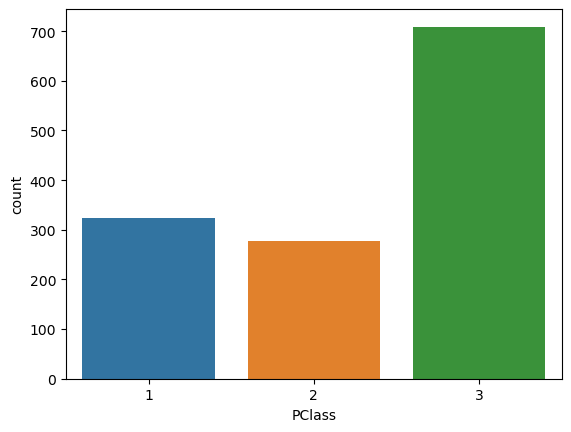

In [9]:
#Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco

sns.countplot(data=tit, x='PClass')


In [14]:
#oppure

npasseggeri_per_classe = tit.groupby('PClass')['PassengerId'].count

#creo il grafico
npasseggeri_per_classe.plot(kind=bar)

#aggiungo le etichette
plt.title = ('N. passeggeri per classe')
plt.xlabel = ('Classe')
plt.ylabel = ('Conteggio')

AttributeError: 'function' object has no attribute 'plot'

<Axes: xlabel='Survived', ylabel='count'>

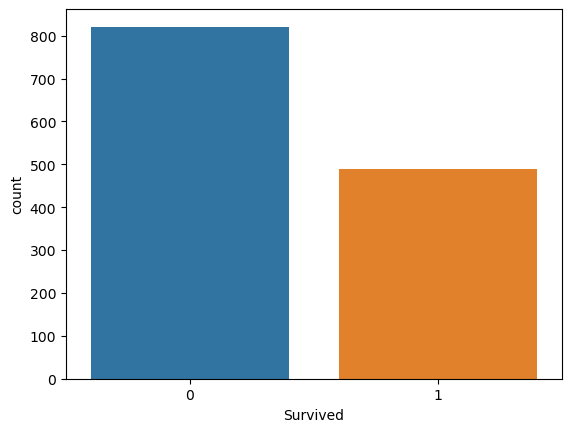

In [10]:
#Fare la stessa cosa per la colonna alive 

sns.countplot(data=tit, x='Survived')


Text(0, 0.5, 'Conteggio')

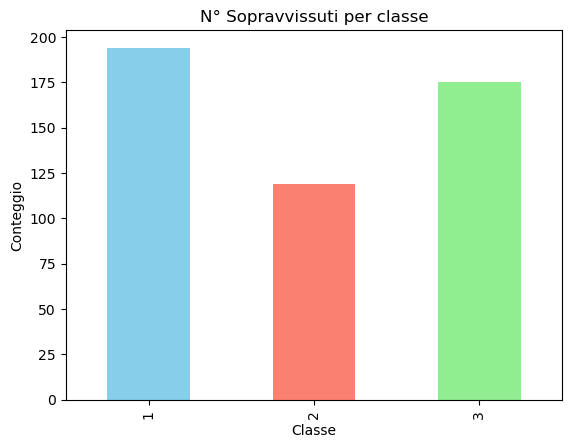

In [22]:
#oppure

passeggeri_sopravvissuti = tit[tit["Survived"] == 1]

conteggio2 = passeggeri_sopravvissuti.groupby("PClass")["PassengerId"].count()

colori = ["skyblue", "salmon", "lightgreen"]
conteggio2.plot(kind = "bar", color=colori)
plt.title("N° Sopravvissuti per classe")
plt.xlabel("Classe")
plt.ylabel("Conteggio")

<Axes: ylabel='Frequency'>

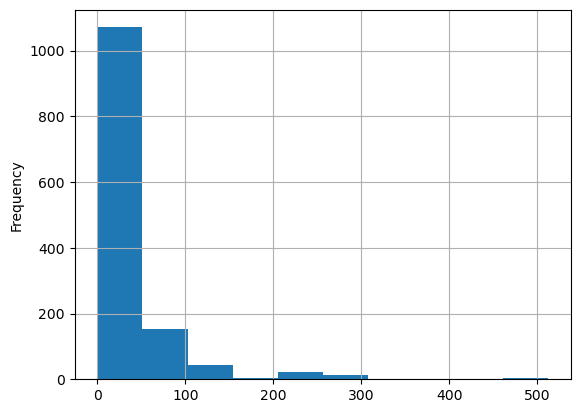

In [25]:
#Qual era la distribuzione delle tariffe (fare)? 
tit.Fare.plot(kind='hist', grid=True)

C:\Users\ludom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

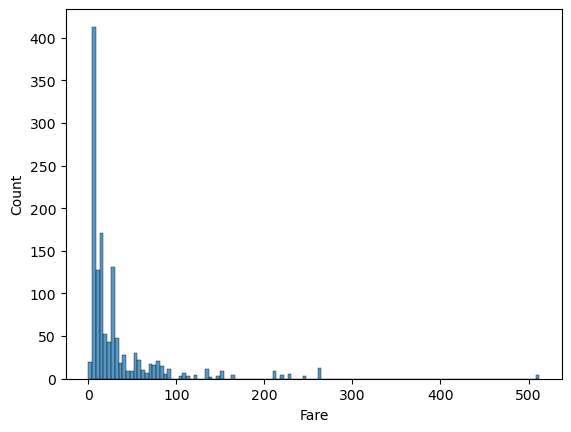

In [29]:
sns.histplot(data=tit, x='Fare')

<Axes: xlabel='PClass', ylabel='Age'>

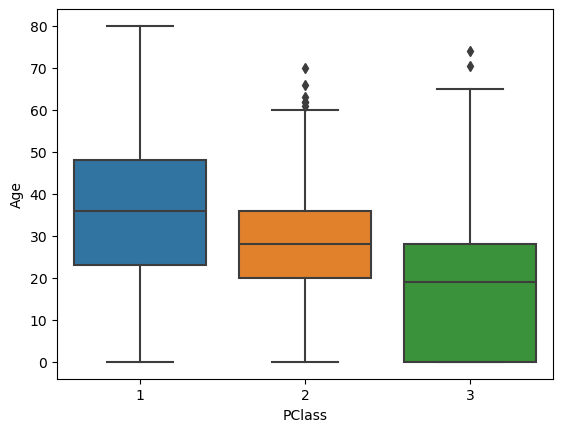

In [24]:
#Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? 
   #Proviamo con un boxplot e con un violinplot 

sns.boxplot(data=tit, x="PClass", y="Age")

<Axes: xlabel='PClass', ylabel='Age'>

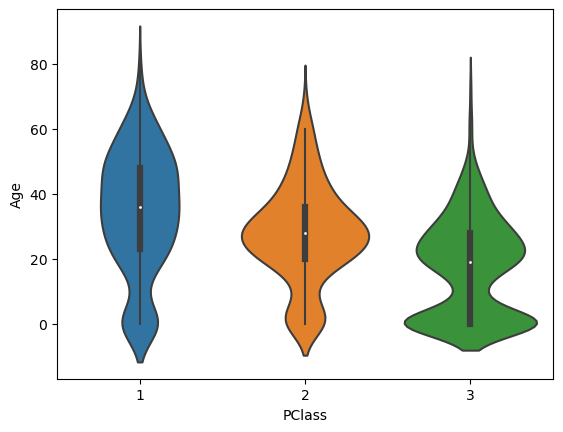

In [21]:
sns.violinplot(data=tit, x="PClass", y="Age")

<Axes: xlabel='Survived', ylabel='Fare'>

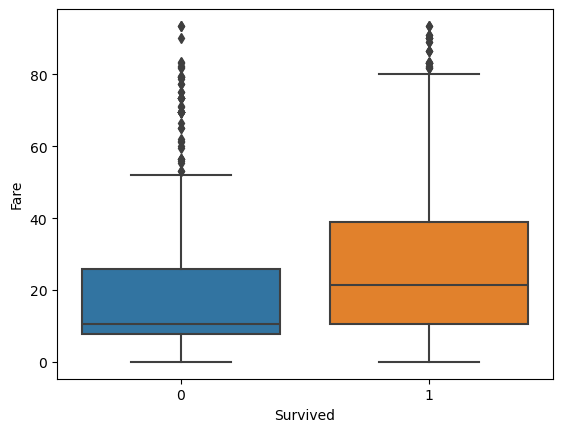

In [42]:
#Visualizziamo un boxplot rispetto alle colonne fare e survived; che cose ne deduciamo?
sns.boxplot(data=tit[tit['Fare']<=100], x="Survived", y="Fare")

In [55]:
"""Esercizio 
Scarichiamo il dataset stockdata.csv e: 
• Visualizziamo l'andamento delle azioni della Apple ("AAPL") 
• Visualizziamo l'andamento di tutte le azioni del dataset 
• Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013 
• Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso"""

stock = pd.read_csv('beginner datasets 1/stockdata.csv')
stock

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


In [56]:
stock["Date"] = pd.to_datetime(stock["Date"], format = "%Y-%m-%d")

In [57]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   MSFT    2306 non-null   float64       
 1   IBM     2306 non-null   float64       
 2   SBUX    2306 non-null   float64       
 3   AAPL    2306 non-null   float64       
 4   GSPC    2306 non-null   float64       
 5   Date    2306 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 108.2 KB


In [58]:
stock.describe()

,MSFT,IBM,SBUX,AAPL,GSPC,Date
count,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306
mean,28.737785,136.239600,23.213089,54.719810,1459.999869,2011-07-31 21:25:45.533391104
min,12.630211,61.274273,3.284911,10.345740,676.530029,2007-01-03 00:00:00
25%,22.582537,102.407469,10.792787,22.929971,1198.417481,2009-04-17 18:00:00
50%,24.990737,143.833125,17.896952,49.327484,1402.370056,2011-07-30 12:00:00
75%,33.873379,172.566340,35.305682,78.102594,1770.579986,2013-11-12 18:00:00
max,56.146870,198.948796,63.098822,130.671320,2130.820068,2016-03-01 00:00:00
std,9.471737,37.376360,15.522634,34.645282,361.673516,NaN


In [59]:
stock.shape

(2306, 6)

In [60]:
#iteriamo ogni colonna del dataframe
for column in stock.columns:
    #sommiamo i valori nulli (i dati booleani vengono interpretati come 1 e 0)
    nan_count = stock[column].isna().sum()
    #calcoliamo la percentuale
    nan_percentage = round( (nan_count/stock.shape[0])*100, 2)
    print(f"{column} contains {nan_count} NaN values, {nan_percentage}% of all rows.")

MSFT contains 0 NaN values, 0.0% of all rows.
IBM contains 0 NaN values, 0.0% of all rows.
SBUX contains 0 NaN values, 0.0% of all rows.
AAPL contains 0 NaN values, 0.0% of all rows.
GSPC contains 0 NaN values, 0.0% of all rows.
Date contains 0 NaN values, 0.0% of all rows.


In [61]:
stock.set_index('Date', inplace=True, drop=False)

<Axes: xlabel='Date'>

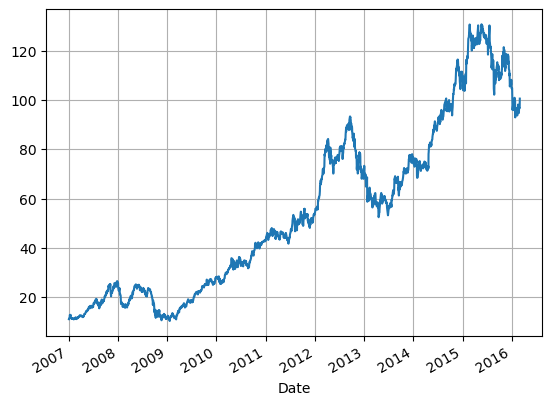

In [62]:
#Visualizziamo l'andamento delle azioni della Apple ("AAPL")
stock.AAPL.plot(grid=True)

C:\Users\ludom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ludom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='AAPL'>

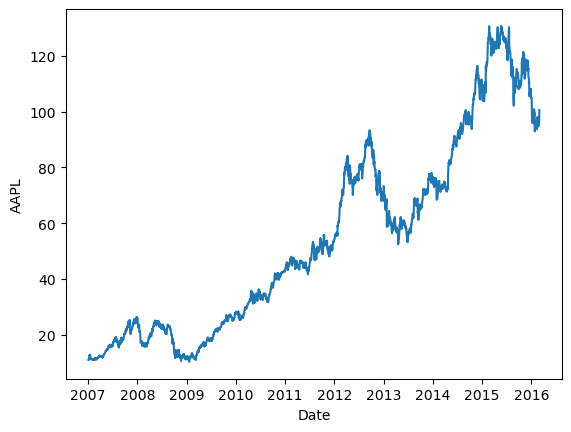

In [63]:
#oppure usando Seaborn
sns.lineplot(data=stock, x='Date', y='AAPL')

<Axes: xlabel='Date'>

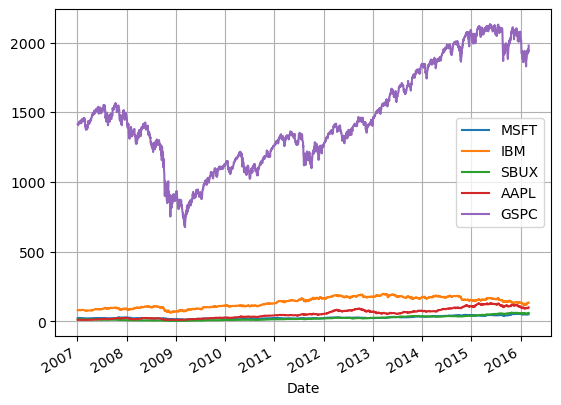

In [69]:
#Visualizziamo l'andamento di tutte le azioni del dataset
stock[["MSFT","IBM","SBUX","AAPL","GSPC"]].plot(grid=True)

<Axes: xlabel='Date'>

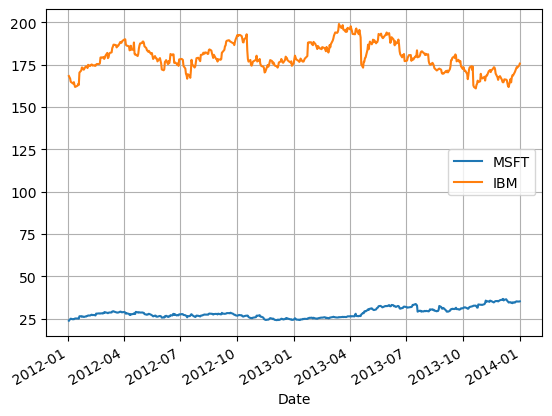

In [67]:
#Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013 
filtro_anni = (stock.Date.dt.year==2012) | (stock.Date.dt.year==2013)
filtro_aziende = ['MSFT', 'IBM']
stock.loc[filtro_anni, filtro_aziende].plot(grid=True)

<Axes: ylabel='Frequency'>

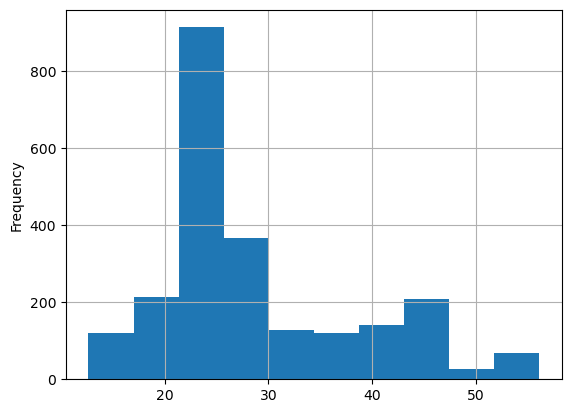

In [68]:
#Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso
stock.MSFT.plot(kind='hist', grid=True)

C:\Users\ludom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSFT', ylabel='Count'>

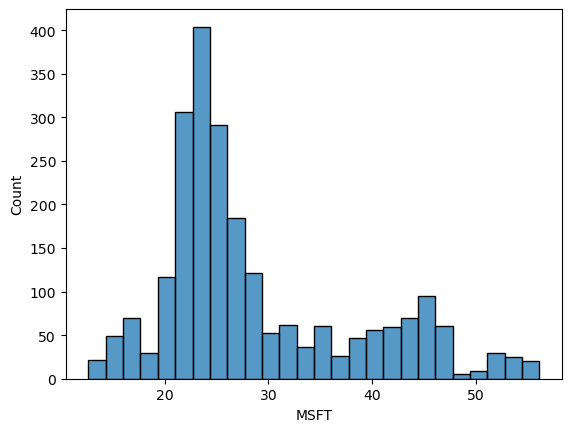

In [70]:
#oppure con Seaborn
sns.histplot(data=stock, x='MSFT')

In [3]:
"""Esercizio 
Scarichiamo il dataset metal_bands_2017.csv e: 
• Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo? 
• Delle band che suonano sia Progressive che Thrash, 
realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine 
(nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare ["style"] e non .style perché quest'ultimo è un metodo) 
• Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); 
si nota qualche trend?"""

bands = pd.read_csv('beginner datasets 1/metal_bands_2017.csv', encoding='latin1', index_col=0)
bands

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [82]:
ordered = bands.sort_values('fans', ascending=False)

C:\Users\ludom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ludom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fans', ylabel='band_name'>

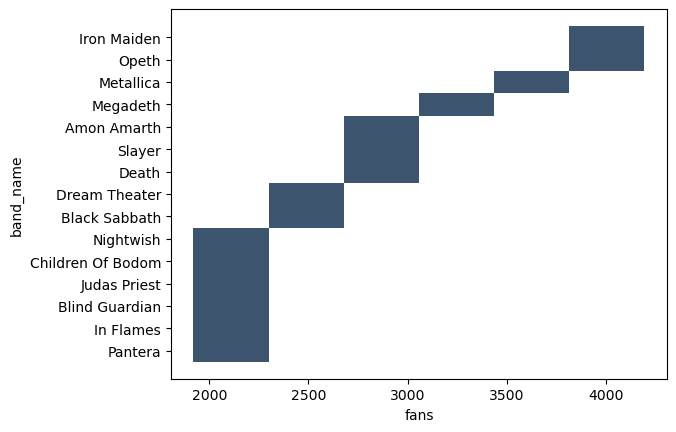

In [86]:
#Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo?
sns.histplot(data=ordered.head(30), x='fans', y='band_name')             #il grafico è fatto solo sulle prime 30 righe

C:\Users\ludom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


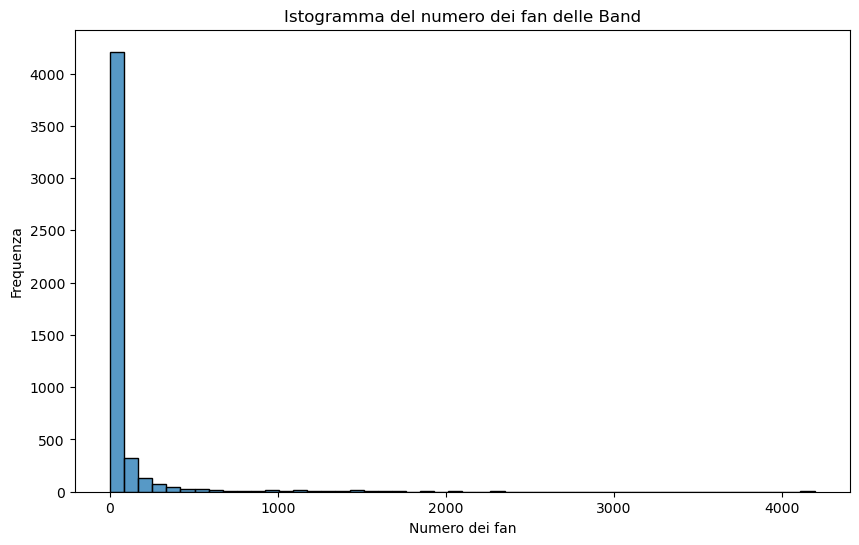

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(bands['fans'], bins=50)
plt.title('Istogramma del numero dei fan delle Band')
plt.xlabel('Numero dei fan')
plt.ylabel('Frequenza')
plt.show()

In [ ]:
"""
Delle band che suonano sia Progressive che Thrash, 
realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine 
(nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare ["style"] e non .style perché quest'ultimo è un metodo) 
"""

<Axes: xlabel='fans', ylabel='origin'>

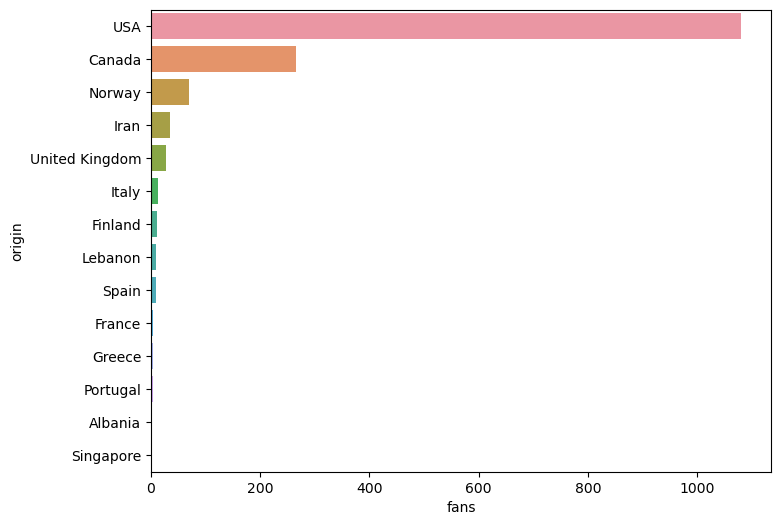

In [9]:
plt.figure(figsize=(8,6))
bands_progress_thrash = bands[bands['style'].str.contains('Progressive') & bands['style'].str.contains('Thrash')]
fans_by_country = bands_progress_thrash.groupby('origin')['fans'].sum().reset_index()

sns.barplot(data=fans_by_country.sort_values('fans', ascending=False), x='fans', y='origin')

In [11]:
"""
Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); 
si nota qualche trend?
"""

bands.formed = pd.to_datetime(bands.formed, errors='coerce')
bands.formed 

0      1975-01-01
1      1990-01-01
2      1981-01-01
3      1983-01-01
4      1988-01-01
          ...    
4995   2006-01-01
4996   2003-01-01
4997   2006-01-01
4998   1983-01-01
4999   2014-01-01
Name: formed, Length: 5000, dtype: datetime64[ns]

In [ ]:
bands.formed.dt.year.plot(kind='hist')

C:\Users\ludom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='formed', ylabel='Count'>

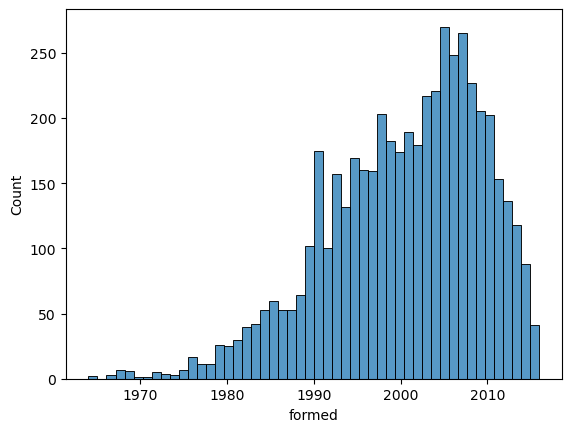

In [18]:
sns.histplot(data=bands, x='formed', bins=50)

In [17]:
"""Esercizio Scarichiamo il dataset election.csv: 
• Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti) 
• Con un grafico a barre confrontiamo il numero di votanti per ogni distretto 
• Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti per ogni candidato"""

elect = pd.read_csv('beginner datasets 1/election.csv')
elect

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


In [19]:
elect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district     58 non-null     object
 1   Coderre      58 non-null     int64 
 2   Bergeron     58 non-null     int64 
 3   Joly         58 non-null     int64 
 4   total        58 non-null     int64 
 5   winner       58 non-null     object
 6   result       58 non-null     object
 7   district_id  58 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.8+ KB


<Axes: >

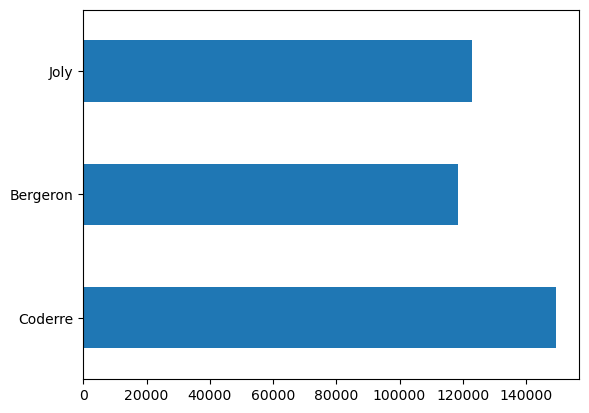

In [23]:
#Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)
elect.loc[:,['Coderre', 'Bergeron', 'Joly']].sum().plot(kind='barh')


C:\Users\ludom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

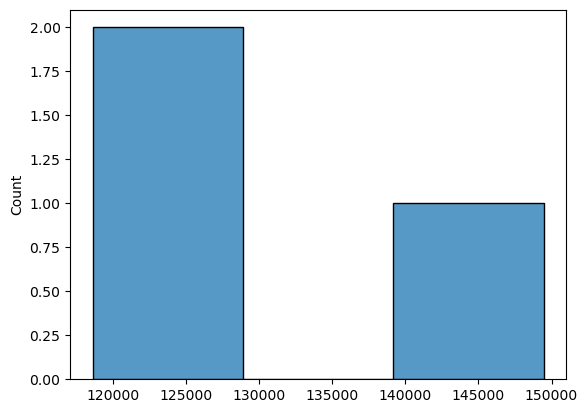

In [25]:
sns.histplot(data=elect.loc[:,['Coderre', 'Bergeron', 'Joly']].sum())

In [ ]:
#Con un grafico a barre confrontiamo il numero di votanti per ogni distretto

In [ ]:
"""Esercizio Scarichiamo i file party_in_nyc.csv dal dataset https://www.kaggle.com/datasets/somesnm/partynyc 
relativo a quante volte è stata chiamata la polizia per delle feste eccessivamente rumorose: 
• Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale 
• Qual è il rettangolo di latitudine e longitudine considerato dal dataset? 
• Quante segnalazioni sono state fatte per case private? 
• Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; 
che succede se aggiungiamo il parametro hue="Location Type"?"""